In [1]:
from scipy.integrate import odeint,quad,trapz,solve_ivp, ode
from IPython.display import Image # for Notebook
from IPython.core.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
import scipy.linalg as linalg
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib import cm
from scipy import optimize
from scipy.optimize import fsolve
from pylab import rcParams
import seaborn as sns
from scipy.special import eval_hermite
from scipy.special import gamma
from scipy.special import genlaguerre
fal = 30 # fontsize axis labels

ftl = 20 # fontsize tick labels

mpl.rcParams['xtick.labelsize'] = ftl

mpl.rcParams['ytick.labelsize'] = ftl

# mpl.rcParams['ztick.labelsize'] = ftl

mpl.rcParams['axes.labelsize'] = fal

#m = cm.ScalarMappable(cmap=cm.jet)

mpl.rcParams['font.weight'] = 'normal'



lw = 3.0 # linewidth for line plots

mpl.rcParams['mathtext.fontset'] = 'cm'

mpl.rcParams['mathtext.rm'] = 'serif'



plt.style.use('seaborn')



rcParams['figure.figsize'] = 8, 8 

axis_fs = 30

savefig_flag = True

In [2]:
import quantum_1DOF

In [3]:
#%% Comparison of the analytical solution of the harmonic oscilattor with its numerical solution computed using the FGH method.
omega=1.0
N = 599
a = -4
b = 4
h = 1
H=quantum_1DOF.Qdist_H_jk_FGH(a, b, N, h, omega, 'harmonic')

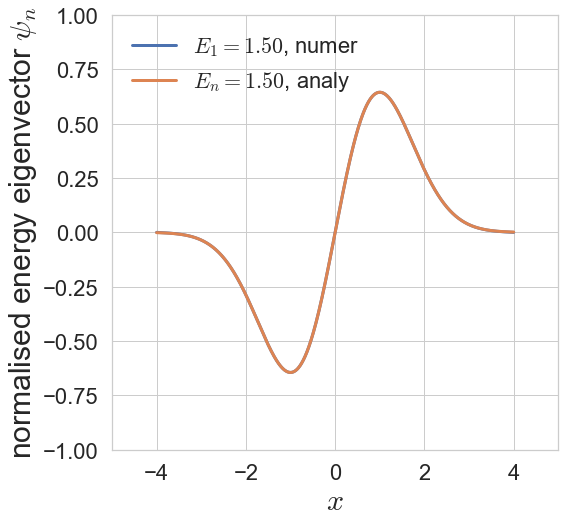

In [4]:
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]
x_range = np.linspace(-4,4,1000)

n = 2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plot2 = ax.plot(a+np.arange(N)*(b-a)/(N-1),evec[:,-n]*np.sqrt((N-1)/(b-a)), '-',lw=lw,label=r'$E_1 = %.2f$, numer' %(evalue[-n]))

plot2an = ax.plot(x_range,quantum_1DOF.harmonic_1dof_analytical(x_range, omega, n - 1, 1), '-',lw=lw,label=r'$E_n = %.2f$, analy' %(h*omega*(n-1+0.5)))

legend = ax.legend(loc='best')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'normalised energy eigenvector $\psi_{n}$', fontsize=axis_fs)
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

plt.show()
# plt.savefig('quantum_harm_eigenvec_1.pdf', format='pdf', \
            # bbox_inches='tight')

In [5]:
#%% Comparison of the analytical solution of the harmonic oscilattor with its numerical solution using the FD method.
omega=1.0
N = 599
a = -4
b = 4
h = 1
H=quantum_1DOF.Qdist_H_jk_FD(a, b, N, h, omega, 'harmonic')

(-1.0, 1.0)

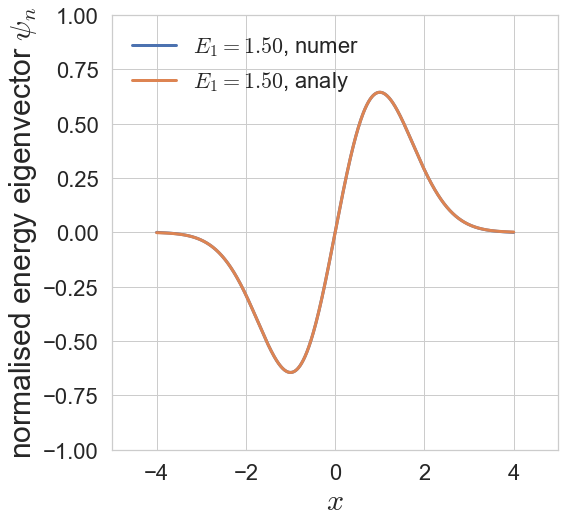

In [6]:
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]
x_range = np.linspace(-4,4,1000)
evec_wbound = np.zeros((N, N-2))
evec_wbound[1:N-1, :] = evec

n=2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plot = ax.plot((a+np.arange(N)*(b-a)/(N-1)),evec_wbound[:,-n]*np.sqrt((N-1)/(b-a)), '-',lw=lw,label=r'$E_1 = %.2f$, numer' %(evalue[-n]))

plotan = ax.plot(x_range,quantum_1DOF.harmonic_1dof_analytical(x_range, omega, n-1, 1), '-',lw=lw,label=r'$E_1 = %.2f$, analy' %(h*omega*(n-1+0.5)))

legend = ax.legend(loc='best')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'normalised energy eigenvector $\psi_{n}$', fontsize=axis_fs)
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

In [7]:
#%% Comparison of the analytical solution of the Morse oscilattor with its numerical solution using the FGH method.
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
aa=1.0
De = 2
xe = 1
N = 179
parameters = np.array([aa, De, xe])
a = -3
b = 10
h = 1
H=quantum_1DOF.Qdist_H_jk_FGH(a, b, N, h, parameters, 'morse')

(-1.0, 1.0)

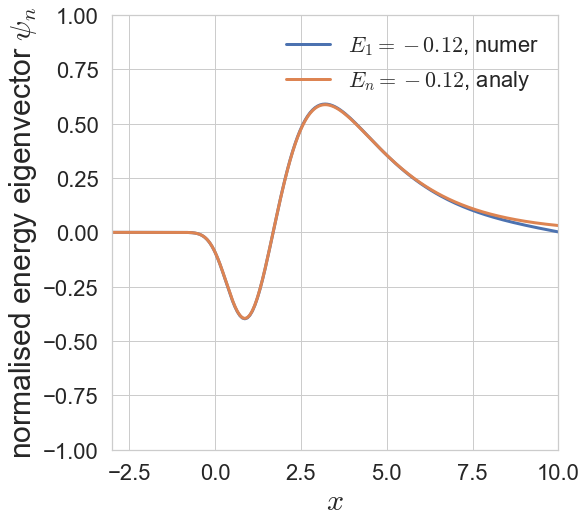

In [8]:
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]
x_range = np.linspace(-3,10,1000)

n=2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()

plot = ax.plot(a+np.arange(N)*(b-a)/(N-1),evec[:,-n]*np.sqrt((N-1)/(b-a)), '-',lw=lw,label=r'$E_1 = %.2f$, numer' %(evalue[-n]))

E_n, psi_n = quantum_1DOF.morse_1dof_analytical(x_range, parameters, n-1, h)
plotan = ax.plot(x_range,psi_n, '-',lw=lw,label=r'$E_n = %.2f$, analy' %(E_n))


legend = ax.legend(loc='best')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'normalised energy eigenvector $\psi_{n}$', fontsize=axis_fs)
ax.set_xlim(-3, 10)
ax.set_ylim(-1, 1)
# plt.show()
# plt.savefig('quantum_morse_eigenvec_1.pdf', format='pdf', \
#             bbox_inches='tight')

In [9]:
#%% Comparison of the analytical solution of the Morse oscilattor with its numerical solution using the FD method. 
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
aa=1.0
De = 2
xe = 1
N = 179
parameters = np.array([aa, De, xe])
a = -3
b = 10
h = 1
H=quantum_1DOF.Qdist_H_jk_FD(a, b, N, h, parameters, 'morse')

(-1.0, 1.0)

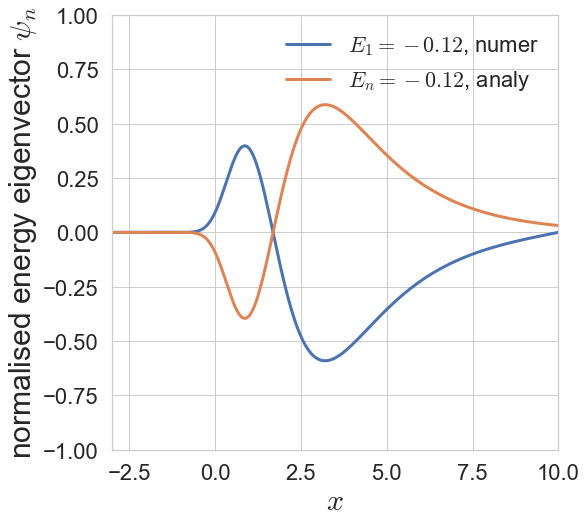

In [10]:
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]
x_range = np.linspace(-3,10,1000)
evec_wbound = np.zeros((N, N-2))
evec_wbound[1:N-1, :] = evec

n = 2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plot = ax.plot((a+np.arange(N)*(b-a)/(N-1)),evec_wbound[:,-2]*np.sqrt((N-1)/(b-a)), '-',lw=lw,label=r'$E_1 = %.2f$, numer' %(evalue[-2]))

E_n, psi_n = quantum_1DOF.morse_1dof_analytical(x_range,parameters, n-1, h)
plotan = ax.plot(x_range,psi_n, '-',lw=lw,label=r'$E_n = %.2f$, analy' %(E_n))

legend = ax.legend(loc='best')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'normalised energy eigenvector $\psi_{n}$', fontsize=axis_fs)
ax.set_xlim(-3, 10)
ax.set_ylim(-1, 1)

In [3]:
#%% numerical solution of the Wigner function for 1 DOF harmonic oscillator, eigenfunction computed using the FGH method
omega=1.0
N = 199
a = -4
b = 4
h = 1
H=quantum_1DOF.Qdist_H_jk_FGH(a, b, N, h, omega, 'harmonic')

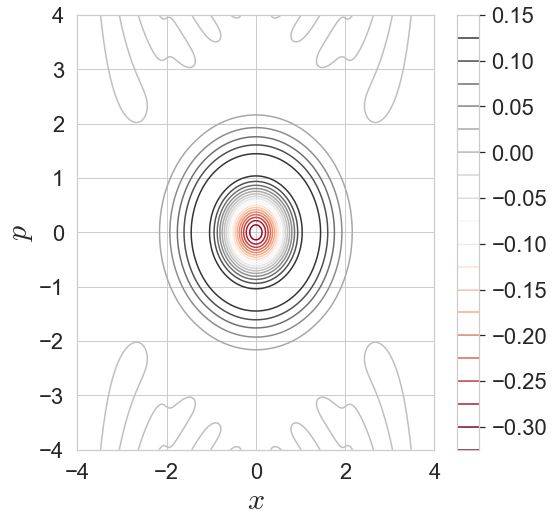

In [4]:
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

n = 2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plotx = np.linspace(a, b, N)
# plotp = np.linspace(-(N-1) // 2, (N-1) // 2 + 1, N) * 2 * np.pi / (b - a)
plotp = np.linspace(a, b, N)
X,P = np.meshgrid(plotx, plotp)
W = quantum_1DOF.Wigner(a, b, N, h, evec[:,-n]*np.sqrt((N-1)/(b-a)))
# W = quantum_1DOF.Wigner(a,b,N, h, quantum_1DOF.harmonic_1dof_analytical(np.linspace(a, b, N), parameters, 4, 1))
cset1 = plt.contour(X, P, W.transpose(), 20, \
                   cmap='RdGy')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$p$', fontsize=axis_fs)
ax.set_xlim(a, b)
# ax.set_ylim(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a))
ax.set_ylim(a, b)
plt.colorbar()
plt.show()
#plt.savefig('quantum_harm1DOF_wigner_num_1_N599.pdf', format='pdf', \
#            bbox_inches='tight')
# plt.savefig('quantum_harm1DOF_wigner_anaevec_1_N599.pdf', format='pdf', \
            # bbox_inches='tight')

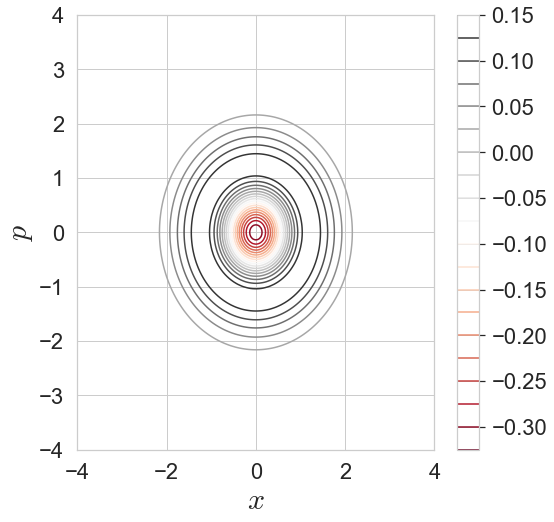

In [5]:
#%% analytical solution of the Wigner function for 1 DOF harmonic oscillator 
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plotx = np.linspace(a, b, N)
plotp = np.linspace(a, b, N)
# plotp = np.linspace(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a), N)
X,P = np.meshgrid(plotx, plotp)
W = np.zeros((N, N))
for j in range(N):
    for k in range(N):
        W[j, k] = quantum_1DOF.Wigner_analytic_harmonic_1(plotx[j], plotp[k], h, 1)
cset1 = plt.contour(X, P, W.transpose(), 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$p$', fontsize=axis_fs)
ax.set_xlim(a, b)
# ax.set_ylim(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm1DOF_wigner_ana_1.pdf', format='pdf', \
#             bbox_inches='tight')

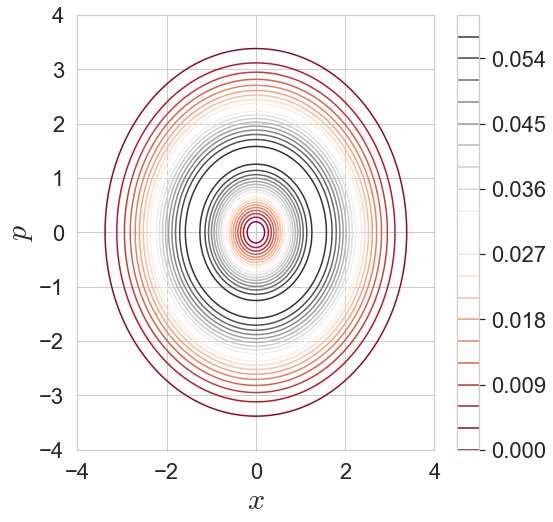

In [6]:
#%% numerical solution of the Husimi function for 1 DOF harmonic oscillator 
evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

n = 2
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plotx = np.linspace(a, b, N)
plotp = np.linspace(-(N-1) // 2, (N-1) // 2 + 1, N) * 2 * np.pi / (b - a)
plotp = np.linspace(a, b, N)
X,P = np.meshgrid(plotx, plotp)
H_1DOF = quantum_1DOF.Husimi(a, b, N, h, 1, evec[:,-n]*np.sqrt((N-1)/(b-a)))
# H_1DOF = quantum_1DOF.Husimi(a,b,N, h, 1, quantum_1DOF.harmonic_1dof_analytical(np.linspace(a, b, N), parameters, n-1, 1))
cset1 = plt.contour(X, P, H_1DOF.transpose(), 20, \
                   cmap='RdGy')
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$p$', fontsize=axis_fs)
ax.set_xlim(a, b)
# ax.set_ylim(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a))
ax.set_ylim(a, b)
plt.colorbar()
plt.show()
#plt.savefig('quantum_harm1DOF_husimi_num_1_N599.pdf', format='pdf', \
#            bbox_inches='tight')
# plt.savefig('quantum_harm1DOF_husimi_anaevec_1_N599.pdf', format='pdf', \
            # bbox_inches='tight')

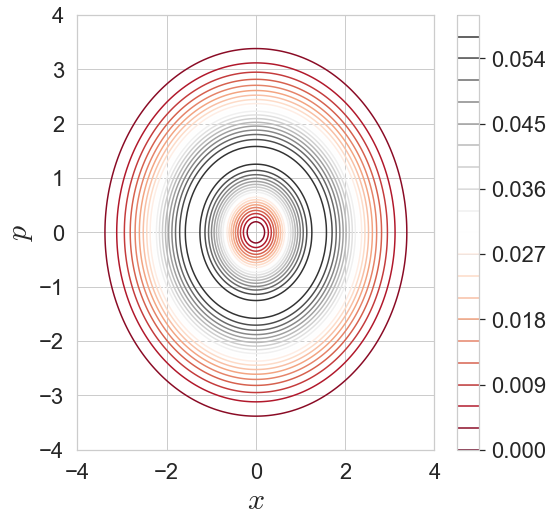

In [7]:
#%% analytical solution of the Husimi function for 1 DOF harmonic oscillator 
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
plotx = np.linspace(a, b, N)
plotp = np.linspace(a, b, N)
# plotp = np.linspace(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a), N)
X,P = np.meshgrid(plotx, plotp)
H_1DOF = np.zeros((N, N))
for j in range(N):
    for k in range(N):
        H_1DOF[j, k] = quantum_1DOF.Husimi_analytic_harmonic_1(plotx[j], plotp[k], h, 1, 1)
cset1 = plt.contour(X, P, H_1DOF.transpose(), 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$p$', fontsize=axis_fs)
ax.set_xlim(a, b)
# ax.set_ylim(-(N-1) // 2 * np.pi / (b - a), (N-1) // 2 * np.pi / (b - a))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm1DOF_husimi_ana_1.pdf', format='pdf', \
#             bbox_inches='tight')



In [16]:
#%% 2 DOF system 
#Comparison of the analytical solution of the 2 DOF harmonic oscilattor with its numerical solution computed using the FGH method.
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
alpha=1.0
mu = 2
N_x = 21
N_y = 23
omega = 1.0
epsilon = 0.0
a = -4
b = 4
c = -4
d = 4
h = 1
parameters = np.array([MASS_A, MASS_B, EPSILON_S, alpha, mu, epsilon, omega])
#H=quantum_1DOF.Qdist_H_lm_jk_FGH(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')
H=quantum_1DOF.Qdist_H_lm_jk_FGHmod(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')

evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

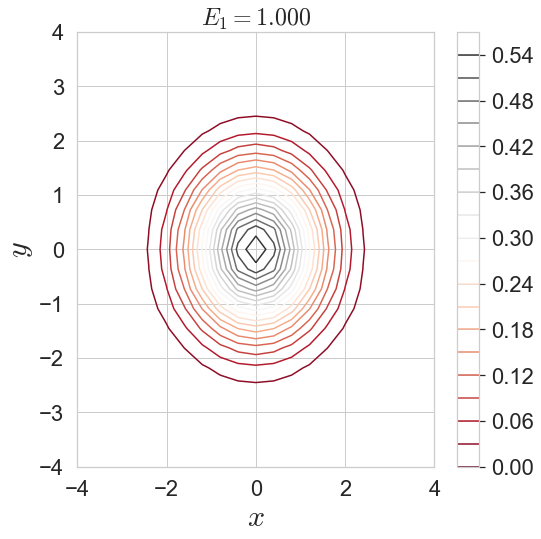

In [17]:
#%%
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n = 1
plotx = np.linspace(a,b,N_x)
ploty = np.linspace(c,d,N_y)
X,Y = np.meshgrid(plotx, ploty)
phi_x_y = np.reshape(evec[:,-n],(N_y,N_x)) * np.sqrt((N_x-1)/(b-a)) * np.sqrt((N_y-1)/(d-c))
plt.contour(X, Y, phi_x_y, 20,cmap='RdGy' %(evalue[-n]))

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title(r'$E_{%s}=%.3f$' %(n, evalue[-n]))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_eigenvec_4_FGH.pdf', format='pdf', \
#             bbox_inches='tight')

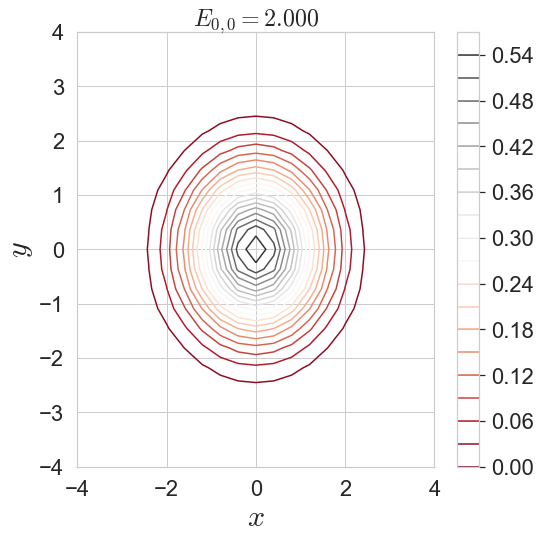

In [18]:
#%% Analytical solution of the 2 DOF harmonic oscilattor
psi_x_y = np.zeros((N_y, N_x))
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n_x = 0 # n_x, n_y are quantum numbers in x, y coordinates
n_y = 0
plotx = np.linspace(a,b,N_x)
ploty = np.linspace(c,d,N_y)
X,Y = np.meshgrid(plotx, ploty)
evalue = h*parameters[4]*(n_x+n_y+1)
for i in range(N_x):
    for j in range(N_y):
        psi_x_y[j, i] = quantum_1DOF.harmonic_2DOF_analytical(plotx[i], ploty[j], omega, n_x, n_y, h)
# projection of the energy eigenfunction on the x-y configuration space
cset1 = plt.contour(X, Y, psi_x_y, 20, \
                   cmap='RdGy' %(evalue))
ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title(r'$E_{%s,%s}=%.3f$' %(n_x, n_y, evalue))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_eigenvec_0_ana.pdf', format='pdf', \
#             bbox_inches='tight')

In [19]:
#%% Comparison of the analytical solution of the 2 DOF harmonic oscilattor with its numerical solution computed using the FD method.
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
alpha=1.0
mu = 2
N_x = 41
N_y = 43
omega = 1.0
epsilon = 0.0
a = -4
b = 4
c = -4
d = 4
h = 1
parameters = np.array([MASS_A, MASS_B, EPSILON_S, alpha, mu, epsilon, omega])
H=quantum_1DOF.Qdist_H_lm_jk_FD(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')

evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

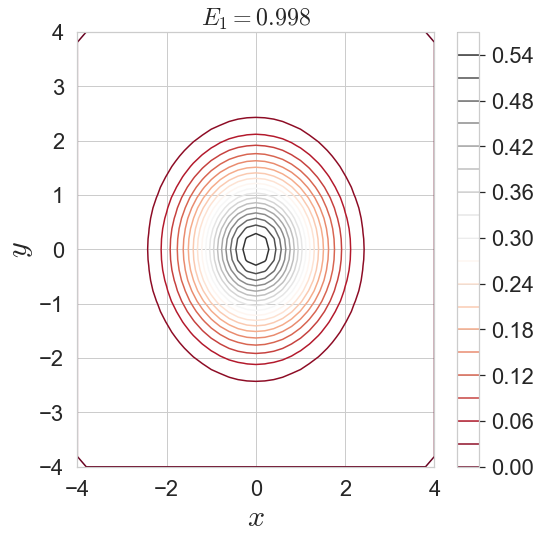

In [20]:
#%%
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n = 1
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)

X,Y = np.meshgrid(plotx, ploty)
psi_x_y = np.reshape(evec[:,-n],(N_y-2,N_x-2)) * np.sqrt((N_x-1)/(b-a)) * np.sqrt((N_y-1)/(d-c))
psi_x_y_wbound = np.zeros((N_y, N_x))
psi_x_y_wbound[1:(N_y-1), 1:(N_x-1)] = psi_x_y
plt.contour(X, Y, psi_x_y_wbound, 20,cmap='RdGy' %(evalue[-n]))

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title(r'$E_{%s}=%.3f$' %(n, evalue[-n]))
plt.colorbar()
plt.show()
# plt.savefig('quantum_sd2DOF_eigenvec_0_FD.pdf', format='pdf', \
#             bbox_inches='tight')

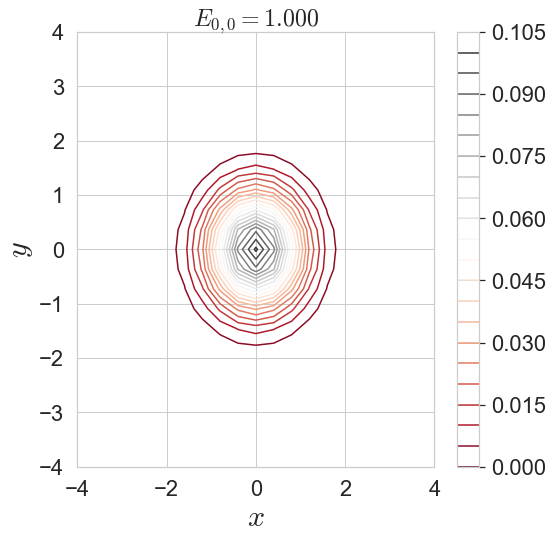

In [21]:
#%% Analytical solution of the 2 DOF Wigner function with p_x=p_y=0, the function Wigner_2dof_harmonic only support n_x, n_y =0,1
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
n_x = 0 # only support n_x=0,1 in the analytical solution calculation
n_y = 0 # only support n_y=0,1 in the analytical solution calculation
N_x = 21
N_y = 23
h = 1
a = -4
b = 4
c = -4
d = 4
alpha = 1
mu = 1
omega = 1.0
epsilon = 0.0

parameters = np.array([MASS_A, MASS_B, EPSILON_S, alpha, mu, epsilon, omega])
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)
X,Y = np.meshgrid(plotx, ploty)
evalue = h*parameters[4]*(n_x+n_y+1)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
Wigner_2dof_ana = np.zeros((N_y, N_x))
for i in range(N_x):
    for j in range(N_y):
        Wigner_2dof_ana[j, i] = quantum_1DOF.Wigner_2dof_harmonic(plotx[i], ploty[j], 0, 0, n_x, n_y, h, omega, omega)
cset1 = plt.contour(X, Y, Wigner_2dof_ana, 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title(r'$E_{%s,%s}=%.3f$' %(n_x, n_y, evalue))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_wigner_2_ana_px0py0.pdf', format='pdf', \
#             bbox_inches='tight')

In [22]:
#%% Compute the energy eigenfunction using the FGH method
#H=quantum_1DOF.Qdist_H_lm_jk_FGH(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')
H=quantum_1DOF.Qdist_H_lm_jk_FGHmod(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')

evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

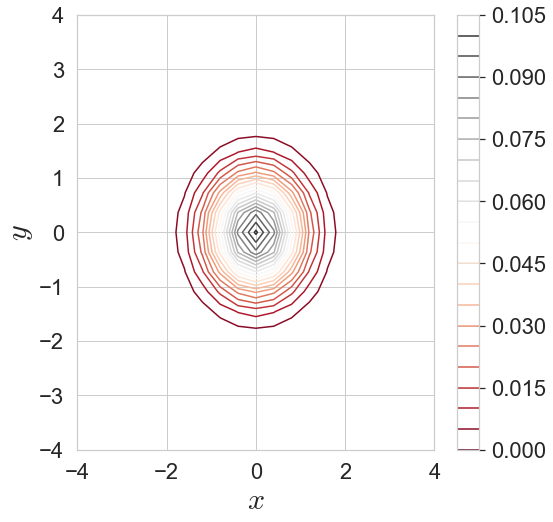

In [23]:
#%% Numerical solution of the 2 DOF Wigner function with the energy eigenfunction computed using the FGH method
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)
X,Y = np.meshgrid(plotx, ploty)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n = 1
psi_x_y = np.reshape(evec[:,-n],(N_y,N_x)) * np.sqrt((N_x-1)/(b-a)) * np.sqrt((N_y-1)/(d-c))
W_2dof = quantum_1DOF.Wigner_2dof(a, b, c, d, N_x, N_y, h, psi_x_y.transpose())
# projection of the Wigner function on the x-y configuration space
cset1 = plt.contour(X, Y, W_2dof.transpose(), 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_wigner_2_num_px0py0.pdf', format='pdf', \
#             bbox_inches='tight')

In [24]:
#%% Compute the energy eigenfunction using the FD method
H=quantum_1DOF.Qdist_H_lm_jk_FD(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')

evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

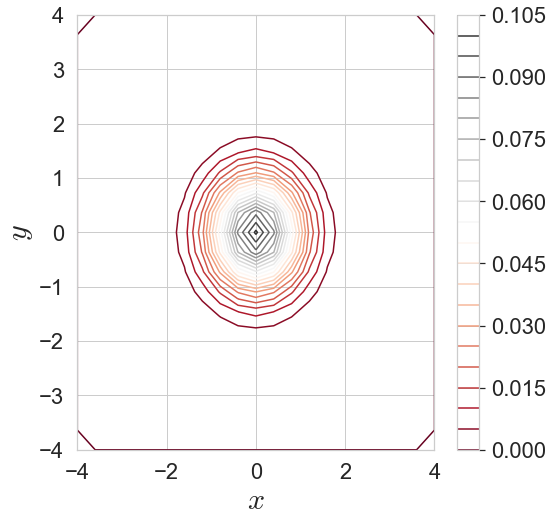

In [25]:
#%% Numerical solution of the 2 DOF Wigner function with the energy eigenfunction computed using the FD method
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)
X,Y = np.meshgrid(plotx, ploty)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n = 1
psi_x_y = np.reshape(evec[:,-n],(N_y-2,N_x-2)) * np.sqrt((N_x-1)/(b-a)) * np.sqrt((N_y-1)/(d-c))
psi_x_y_wbound = np.zeros((N_y, N_x))
psi_x_y_wbound[1:(N_y-1), 1:(N_x-1)] = psi_x_y
W_2dof = quantum_1DOF.Wigner_2dof(a, b, c, d, N_x, N_y, h, psi_x_y_wbound.transpose())
# projection of the Wigner function on the x-y configuration space
cset1 = plt.contour(X, Y, W_2dof.transpose(), 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_wigner_2_num_px0py0.pdf', format='pdf', \
#             bbox_inches='tight')

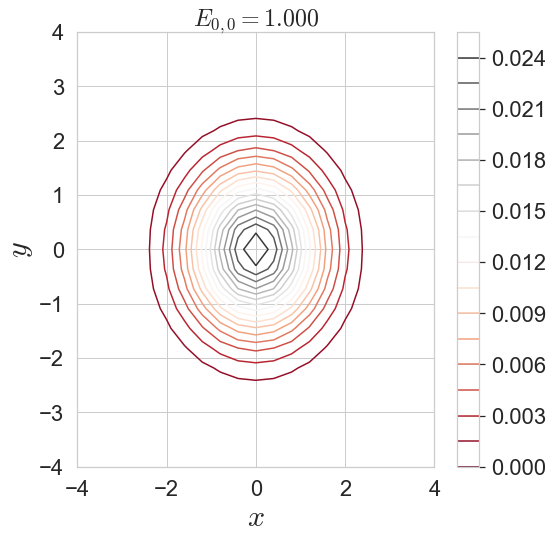

In [26]:
#%% Analytical solution of the 2 DOF Husimi function with p_x=p_y=0, the function Wigner_2dof_harmonic only support n_x, n_y =0,1
MASS_A=1.0
MASS_B=1.0
EPSILON_S=0.0
n_x = 0 # only support n_x=0,1 in the analytical solution calculation
n_y = 0 # only support n_y=0,1 in the analytical solution calculation
N_x = 21
N_y = 23
h = 1
a = -4
b = 4
c = -4
d = 4
alpha = 1
mu = 1
omega = 1.0
epsilon = 0.0
sigma_1 = 1
sigma_2 = 1
parameters = np.array([MASS_A, MASS_B, EPSILON_S, alpha, mu, epsilon, omega])
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)
X,Y = np.meshgrid(plotx, ploty)
evalue = h*parameters[4]*(n_x+n_y+1)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
Husimi_2dof_ana = np.zeros((N_y, N_x))
for i in range(N_x):
    for j in range(N_y):
        Husimi_2dof_ana[j, i] = quantum_1DOF.Husimi_2dof_harmonic(plotx[i], ploty[j], 0, 0, n_x, n_y, h, omega, omega, sigma_1, sigma_2)
cset1 = plt.contour(X, Y, Husimi_2dof_ana, 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
ax.set_title(r'$E_{%s,%s}=%.3f$' %(n_x, n_y, evalue))
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_husimi_2_ana_px0py0.pdf', format='pdf', \
#             bbox_inches='tight')

In [27]:
#%% Compute the energy eigenfunction using the FGH method
#H=quantum_1DOF.Qdist_H_lm_jk_FGH(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')
H=quantum_1DOF.Qdist_H_lm_jk_FGHmod(a, b, c, d, N_x, N_y, h, parameters, 'harmonic')

evalue,evec=np.linalg.eig(H)
idx = evalue.argsort()[::-1]   
evalue = evalue[idx]
evec = evec[:,idx]

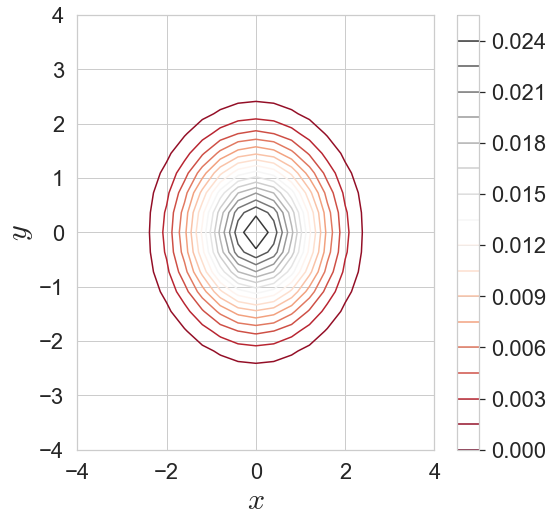

In [28]:
#%% Numerical solution of the 2 DOF Husimi function with the energy eigenfunction computed using the FGH method
plotx = np.linspace(a, b, N_x)
ploty = np.linspace(c, d, N_y)
X,Y = np.meshgrid(plotx, ploty)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = plt.gca()
n = 1
psi_x_y = np.reshape(evec[:,-n],(N_y,N_x)) * np.sqrt((N_x-1)/(b-a)) * np.sqrt((N_y-1)/(d-c))
H_2dof = quantum_1DOF.Husimi_2dof(a, b, c, d, N_x, N_y, h, sigma_1, sigma_2, psi_x_y.transpose())
# projection of the PES on the x-y configuration space
cset1 = plt.contour(X, Y, H_2dof.transpose(), 20, \
                   cmap='RdGy')

ax.set_xlabel(r'$x$', fontsize=axis_fs)
ax.set_ylabel(r'$y$', fontsize=axis_fs)
ax.set_xlim(a, b)
ax.set_ylim(c, d)
plt.colorbar()
plt.show()
# plt.savefig('quantum_harm2DOF_husimi_2_num_px0py0.pdf', format='pdf', \
#             bbox_inches='tight')
# plt.savefig('quantum_sd2DOF_husimi_2_num_px0py0_ep0dot1.pdf', format='pdf', \
#             bbox_inches='tight')